In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from function_creation import draw_chart,draw_chart2, print_label, calc_means, calc_sems, count_sample

In [7]:
#read, select, and rename the columns
df2 = pd.read_csv("FANG_plus.csv",encoding="utf-8")
#df2['year'].dtype
#df2['year'].astype(int)
#df2['position'].value_counts() #6819 different descriptions of position incl. anonymous(27002)
df2.head(2)
#df2['year'].value_counts()

,0,company,location,year,status,position,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt
0,1,google,none,2018.0,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA",2013.0,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0


### Comparison of the overall opinions between former and current emplyees

In [8]:
#draw the bar chart of 'overall' ratings over status by company
m_data =df2.groupby(['company','status'])['overall'].mean()
m1_data = m_data.to_frame(name=None)
mm=m1_data.unstack('status')
mm

overall                
status    Current Employee Former Employee
company                                   
amazon            3.795661        3.171523
apple             4.059349        3.828395
facebook          4.667709        3.871383
google            4.425732        4.210828
microsoft         3.914430        3.650203
netflix           3.925926        2.893564

<IPython.core.display.Javascript object>


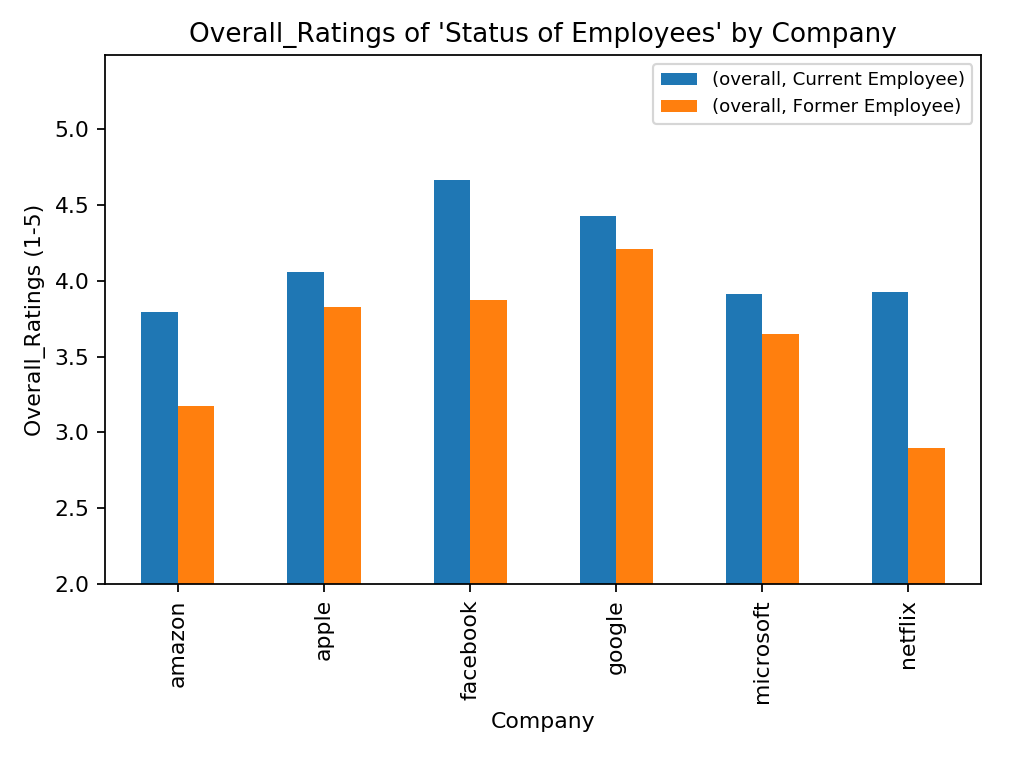

In [9]:
%matplotlib notebook
mm.plot.bar()
plt.ylim(2.0, 5.49)
plt.title(f"Overall_Ratings of 'Status of Employees' by Company")
plt.xlabel(f"Company")
plt.ylabel(f"Overall_Ratings (1-5)")

plt.legend(loc="upper right", fontsize="small", fancybox=True)
plt.show()
plt.tight_layout()
plt.savefig(f"./Images/Data_Visualization/status_overall.png")


### participants in the survey
##### i) total participants:67526
##### ii) participants by company>  amazon :26429,  microsoft : 17930 , apple :12949,  google :7819 , facebook :1590, netflix :809

<IPython.core.display.Javascript object>


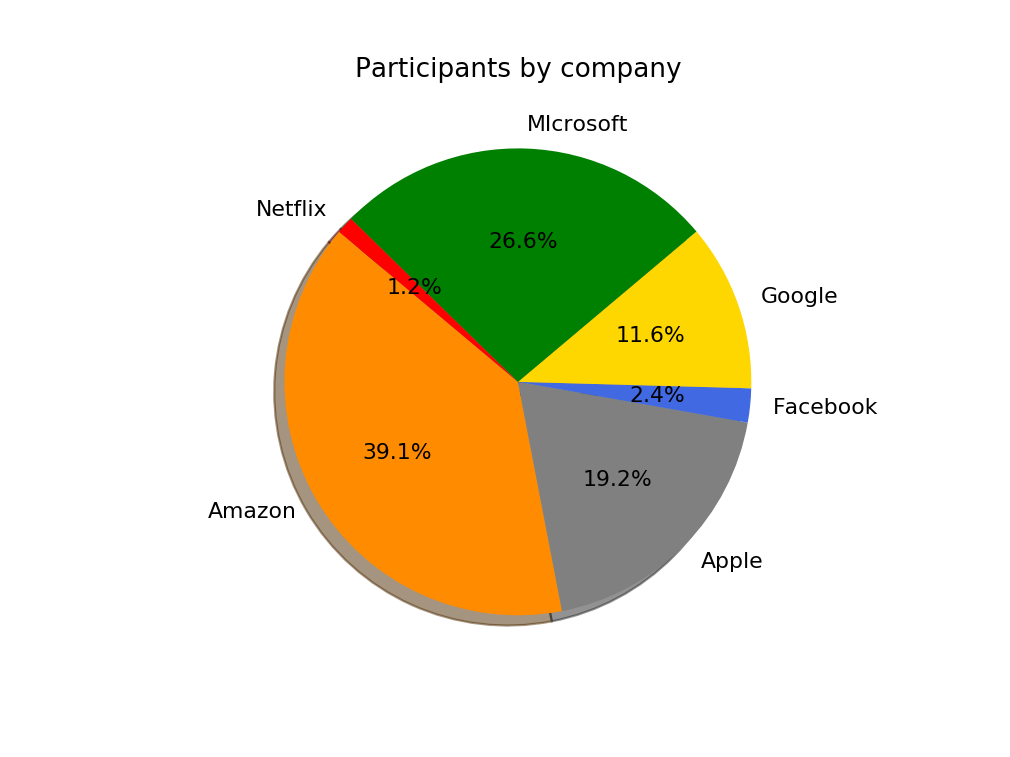

In [10]:
df_g1=df2.groupby(['company'])['status'].count()
#df_g1 

%matplotlib notebook
l = ["Amazon","Apple","Facebook","Google","MIcrosoft", "Netflix"]
c = ["darkorange","grey","royalblue","gold","green","red"]
plt.pie(df_g1, labels=l, colors=c,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(f"Participants by company")
plt.savefig(f"./Images/Data_Visualization/participants_by_company.png")

### Composition of the survey worldwide

######  imported  'location_data.csv" which we created previously:
######  removed  all the 'none' value of rows from the 'location' variable
###### starting with total 42441 samples(rows)

##### 1) USA only        >  
#####                                           WA:11528, CA:7252, TX:1704, NY:1330, FL:772,IL:571,NJ:524, PA:505, VA,AZ,MA,KY,GA,TN,IN:317, etc.
##### 2) Worldside       >   total 106 countries
#####                                           USA:30454,  India: 5247, UK :1493, Ireland :1040, Canada:710, China:319, Australia: 290, Singapore: 264, 
#####                                           Germany :225, France :201, Brazil :160, Costa Rica :149, Luxembourg , South Africa , Israel, Spain, etc.

In [12]:
df_h = pd.read_csv("location_data.csv",encoding="utf-8")
df_h.head(2)

,Unnamed: 0,0,company,location,city,state,country,year,status,position,overall,wk_bal,culture_val,career_opp,comp_benefit,Sr_mgmt
0,0,2,google,"Mountain View, CA",Mountain View,CA,USA,2013.0,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
1,1,3,google,"New York, NY",New York,NY,USA,2014.0,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0


<IPython.core.display.Javascript object>


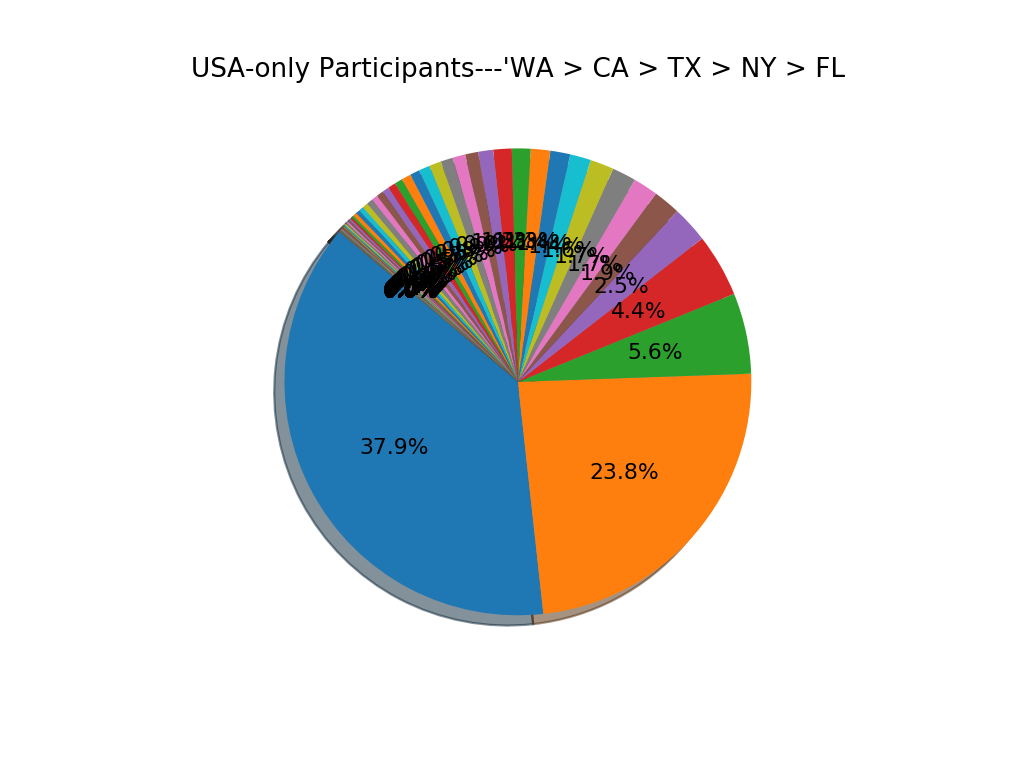

In [13]:
# 1) USA-only
a=df_h[df_h['country']=='USA']['state'].value_counts()  
%matplotlib notebook
plt.pie(a, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(f"USA-only Participants---'WA > CA > TX > NY > FL")
plt.savefig(f"./Images/Data_Visualization/USA_only_participants.png")

<IPython.core.display.Javascript object>


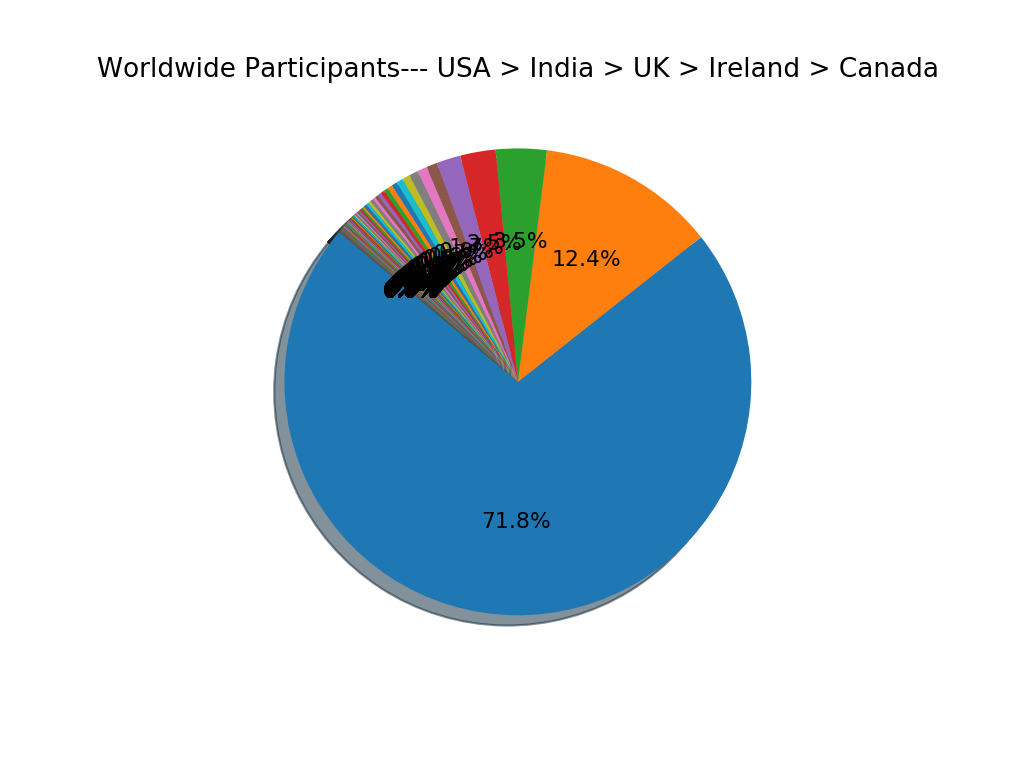

In [14]:
# 2) worldwide
b=df_h['country'].value_counts() 
%matplotlib notebook
plt.pie(b, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(f"Worldwide Participants--- USA > India > UK > Ireland > Canada")
plt.savefig(f"./Images/Data_Visualization/worldwide participants.png")